# Runned in Kaggle notebook

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

#import numpy as np # linear algebra
#import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Importing Train and Test data

In [22]:
train = '/kaggle/input/cat-and-dog/training_set/training_set'
# valid_path = 'data/dogs-vs-cats/valid'
test = '../input/cat-and-dog/test_set/test_set'

# Data Preprocessing

In [23]:
from keras.preprocessing.image import ImageDataGenerator

In [24]:
# Preprocessing the Training set

# Data Augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

# Importing Training set
training_set = train_datagen.flow_from_directory(train,
                                                    target_size=(64, 64),
                                                    batch_size=32,
                                                    class_mode='binary')

Found 8005 images belonging to 2 classes.


In [25]:
# Preprocessing the Test set

# Feature Scaling
test_datagen = ImageDataGenerator(rescale=1./255)

# Importing Test set
test_set = test_datagen.flow_from_directory(test,
                                            target_size=(64, 64),
                                            batch_size=32,
                                            class_mode='binary')

Found 2023 images belonging to 2 classes.


# Building CNN

In [26]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [27]:
cnn = Sequential()

# Step 1 - Add Convolution Layer
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

# Step 2 - Add Pooling Layer
cnn.add(MaxPool2D(pool_size=2, strides=2))

# Add second onvolutional layer with pooling
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

# Step 3 - Add Flattening Layer
cnn.add(Flatten())

# Step 4 - Add Full Connected Layer
cnn.add(Dense(units=128, activation='relu'))

# Step 5 - Add Output Layer
cnn.add(Dense(units=1, activation='sigmoid'))

In [28]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

# Training

In [29]:
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [30]:
model_history = cnn.fit(x=training_set, validation_data=test_set, epochs=20)

Epoch 1/20
251/251 [==============================] - 37s 146ms/step - loss: 0.6710 - accuracy: 0.5839 - val_loss: 0.6211 - val_accuracy: 0.6649
Epoch 2/20
251/251 [==============================] - 35s 140ms/step - loss: 0.6235 - accuracy: 0.6651 - val_loss: 0.6087 - val_accuracy: 0.6752
Epoch 3/20
251/251 [==============================] - 37s 147ms/step - loss: 0.5752 - accuracy: 0.7032 - val_loss: 0.5966 - val_accuracy: 0.6777
Epoch 4/20
251/251 [==============================] - 36s 142ms/step - loss: 0.5474 - accuracy: 0.7193 - val_loss: 0.5192 - val_accuracy: 0.7504
Epoch 5/20
251/251 [==============================] - 36s 144ms/step - loss: 0.5274 - accuracy: 0.7374 - val_loss: 0.5357 - val_accuracy: 0.7479
Epoch 6/20
251/251 [==============================] - 36s 143ms/step - loss: 0.5011 - accuracy: 0.7540 - val_loss: 0.5093 - val_accuracy: 0.7494
Epoch 7/20
251/251 [==============================] - 36s 142ms/step - loss: 0.4837 - accuracy: 0.7693 - val_loss: 0.5216 - val_ac

# Evaluating the Model

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
# List all data in history
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


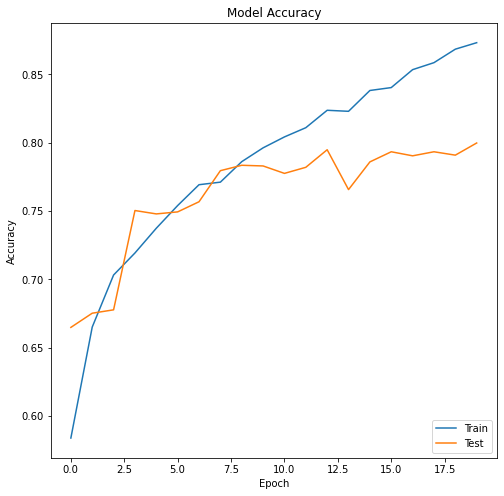

In [33]:
# Summarize history for accuracy

plt.figure(figsize=(8,8))

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

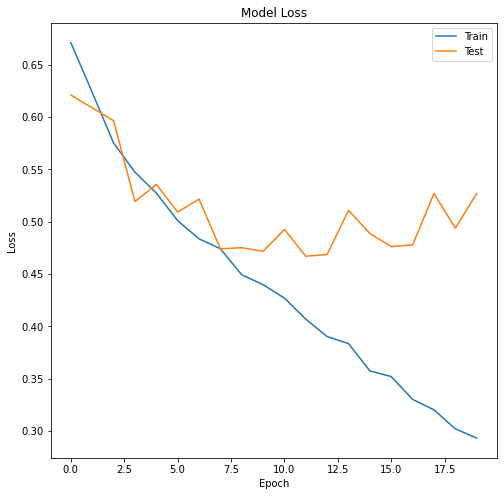

In [34]:
# Summarize history for loss

plt.figure(figsize=(8,8))

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])

plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()